In [3]:
import matplotlib.pyplot as plt
import numpy as np

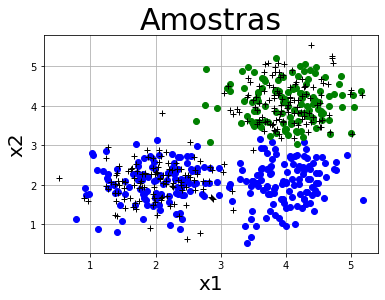

In [4]:
y1 = np.random.normal([2,2], 0.5,[120,2])
yAux = np.random.normal([4,2], 0.5,[120,2])
y2 = np.random.normal([4,4], 0.5,[120,2])


a1 = np.random.normal([2,2], 0.5,[120,2])
a2 = np.random.normal([4,4], 0.5,[120,2])


y1 = np.concatenate((y1,yAux))  

plt.plot(dpi=100)
plt.title("Amostras",size='30')
plt.xlabel('x1',size='20')
plt.ylabel('x2',size='20')
plt.grid()
plt.plot(y1[:,0],y1[:,1],'bo')
plt.plot(y2[:,0],y2[:,1],'go')
plt.plot(a1[:,0],a1[:,1],'k+')
plt.plot(a2[:,0],a2[:,1],'k+')
plt.show()

# 1º Passo
Cálcular as evidências

In [5]:
def evidencia(y1, y2):
    len(y1)
    len(y2)
    
    p1= len(y1)/(len(y1)+len(y2))
    p2= len(y2)/(len(y1)+len(y2))
    
    return p1, p2

In [6]:
p1, p2 = evidencia(y1, y2)
print(p1, p2)

0.6666666666666666 0.3333333333333333


# 2º Passo
Preparar para o cáculo das verossimilhanças

In [7]:
#Função densidade de probabilidade
def pdf(x, y, u1, u2, s1, s2, p):
    c = -1/(2*(1-np.power(p,2)))
    
    e = c * ((np.power((x-u1),2))/np.power(s1,2) + \
             (np.power((y-u2),2))/np.power(s2,2) - \
             (2*p*(x-u1)*(y-u2))/(s1*s2))
    r = 1/(2*np.pi*s1*s2*np.sqrt(1-np.power(p,2)))*np.exp(e)
    return r

In [14]:
def covariancia(y1):
    u1 = np.mean(y1, axis=0)
    a = y1[:,0] - u1[0]
    b = y1[:,1] - u1[1]
    c = np.sum(a*b)/len(y1)
    return np.abs(c)

def corelacao(c, s1, s2):
    cr = c/np.sqrt(np.power(s1,2)*np.power(s2,2))
    return cr

In [15]:
#Cálcula média, desvio padrão e covariância
u1 = np.mean(y1, axis=0)
u2 = np.mean(y2, axis=0)

s1 = np.std(y1, axis=0)
s2 = np.std(y2, axis=0)

c1 = covariancia(y1)
c2 = covariancia(y2)

cr1 = corelacao(c1, s1[0], s1[1])
cr2 = corelacao(c2, s2[0], s2[1])

print(u1, u2)
print(s1, s2)
print(c1, c2)
print(cr1, cr2)

[2.99740746 2.05022871] [4.02950391 4.06732338]
[1.0961249  0.51189402] [0.5156806  0.50887793]
0.032781969694337706 0.004737227099038712
0.05842449140316356 0.01805218582969375


In [16]:
dados = np.array([[800, 10],[700,11],[600,13],[500,14]])
c = covariancia(dados)
print(c)

175.0


In [19]:
def classifica(v1, v2, p1, p2):
    k = v1*p1/v2*p2
    if k >= 1:
        c = 1
    else:
        c = -1
        
        
    return c

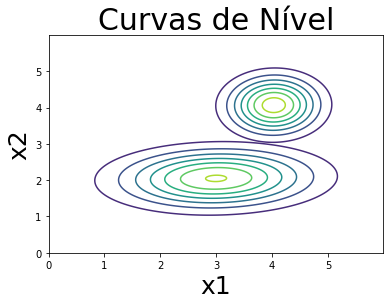

In [24]:
def plotContour():
    x = np.arange(0,6,0.01)
    y = np.arange(0,6,0.01)
    
    xx, yy = np.meshgrid(x, y, sparse=True)
    pdf1 = pdf(xx, yy, u1[0], u1[1], s1[0], s1[1], cr1)
    pdf2 = pdf(xx, yy, u2[0], u2[1], s2[0], s2[1], cr2)
    
    plt.title('Curvas de Nível', size=30)
    plt.xlabel('x1',size=25)
    plt.ylabel('x2',size=25)
    plt.contour(x,y,pdf1)
    plt.contour(x,y,pdf2)
    plt.show()
    
plotContour()

In [18]:
p1, p2 = evidencia(y1, y2)
z = np.zeros((len(a1),2))

for i in range(len(a1)):
    x = a1[i][0]
    y = a1[i][1]
    v1 = pdf(x, y, u1[0], u1[1], s1[0], s1[1], cr1)
    v2 = pdf(x, y, u2[0], u2[1], s2[0], s2[1], cr2)
    c = classifica(v1, v2, p1, p2)
    z[i,0]=c

#print(z)
for i in range(len(a1)):
    x = a2[i][0]
    y = a2[i][1]
    v1 = pdf(x, y, u1[0], u1[1], s1[0], s1[1], cr1)
    v2 = pdf(x, y, u2[0], u2[1], s2[0], s2[1], cr2)
    c = classifica(v1, v2, p1, p2)
    z[i,1]=c
print(z)

[[2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]]


In [226]:
z = np.zeros((2,1))
print(z)

[[0.]
 [0.]]
